# Lucrative Learners

This case study aims at enhancing the lead conversion rate for X Education, an online education company that sells professional courses to industry experts. The project focuses on identifying the most promising leads, also known as "Hot Leads," to increase the efficiency of the company's sales and marketing efforts.

To achieve this goal, the project will:

1. Develop a logistic regression model that assigns a lead score between 0 and 100 to each lead. A higher score indicates a hot lead with a high likelihood of converting, while a lower score signifies a cold lead with a low probability of conversion.
2. Ensure that the model can adapt to new requirements or changes in the company's lead evaluation strategy as specified in a separate document.
3. Provide recommendations for implementation

## About the dataset

1. `Leads.csv`: The dataset is a CSV file with around 9000 data points. It consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. The target variable is the column ‘Converted’ which tells whether a past lead was converted or not wherein `1` means it was converted and `0` means it wasn’t converted
2. `Leads Data Dictionary.xlsx`: is a data dictionary which describes the meaning of the variables.

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import the required Libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, HTML
import ipywidgets as widgets

pd.set_option('display.max_columns', 122)
pd.set_option("display.max_rows", None)
pd.set_option('display.max_colwidth', None)

%matplotlib inline

In [3]:
# Importing our dataset into a dataframe
leads_df = pd.read_csv("data/Leads.csv")
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [267]:
leads_df.shape

(9240, 37)

## Data quality and cleaning

In [220]:
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [221]:
# Check for any duplicate values
leads_df.duplicated().sum()

0

In [222]:
#Find the no. of unique values in every column
leads_df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

**Observation**: Some of the columns have just 1 unique value. So their presence or absence is not going to be a factor in our analysis.

### Handle columns that have only unique values

We can remove the columns `Prospect ID` and `Lead Number` as they have no use in our analysis

In [4]:
# Lead Number Dropping and Prospect ID since they have all unique values

leads_df.drop(['Prospect ID', 'Lead Number'], axis=1, inplace = True)

### Handle columns that have just 1 value

`Magazine`, `Receive More Updates About Our Courses`, `Update me on Supply Chain Content`, `Get updates on DM Content`, `I agree to pay the amount through cheque`

In [5]:
print(leads_df.Magazine.value_counts())
print(leads_df['Receive More Updates About Our Courses'].value_counts())
print(leads_df['Update me on Supply Chain Content'].value_counts())
print(leads_df['Get updates on DM Content'].value_counts())
print(leads_df['I agree to pay the amount through cheque'].value_counts())

No    9240
Name: Magazine, dtype: int64
No    9240
Name: Receive More Updates About Our Courses, dtype: int64
No    9240
Name: Update me on Supply Chain Content, dtype: int64
No    9240
Name: Get updates on DM Content, dtype: int64
No    9240
Name: I agree to pay the amount through cheque, dtype: int64


In [6]:
# Since all these columns have just 1 unique value, they are not going to impact our analysis. Thus, we can drop them.

columns_with_single_value = ['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']

leads_df.drop(columns_with_single_value, axis=1, inplace=True)

print('Shape after dropping', leads_df.shape)

Shape after dropping (9240, 30)


### Analyze columns with missing values

In [306]:
leads_df.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement       

In [307]:
# What is the percentage of missing values
round(leads_df.isnull().mean() * 100, 2).sort_values(ascending = False)

Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
A free copy of Mastering The Interview            0.00
Lead Origi

#### Replace all values labelled "select" with NA values, and re-check null value count

We've been told that several of the categorical variables have a value 'Select'. That means that they were probably in a form or survey and were not filled.

So they can be considered as null values.

In [7]:
leads_df = leads_df.replace('Select', np.nan)
round(leads_df.isnull().mean() * 100, 2).sort_values(ascending = False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
A free copy of Mastering The Interview            0.00
Lead Origi

**Observation**: There are a lot of categorical variables with lots of missing values. Let's look at the columns individually to see what's the best way to handle them:

### Drop columns with high percentages of null values

- `How did you hear about X Education`
- `Lead Profile`
- `Lead Quality`
- `Asymmetrique Profile Score`
- `Asymmetrique Activity Score`
- `Asymmetrique Activity Index`
- `Asymmetrique Profile Index`

In [8]:
columns_to_drop = ['How did you hear about X Education', 'Lead Profile', 'Lead Quality', 'Asymmetrique Profile Score', 'Asymmetrique Activity Score', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index']
leads_df.drop(columns_to_drop, axis=1, inplace = True)
print('Data after dropping:', leads_df.shape)

Data after dropping: (9240, 23)


### Handle data imbalance

- `What matters most to you in choosing a course`
- `Search`
- `Newspaper`
- `Newspaper Article`
- `Digital Advertisement`
- `X Education Forums`
- `Do Not Call`

In [281]:
leads_df['What matters most to you in choosing a course'].value_counts(normalize=True)

Better Career Prospects      0.999541
Flexibility & Convenience    0.000306
Other                        0.000153
Name: What matters most to you in choosing a course, dtype: float64

In [282]:
leads_df['Search'].value_counts(normalize=True)

No     0.998485
Yes    0.001515
Name: Search, dtype: float64

In [283]:
leads_df['Newspaper'].value_counts(normalize=True)

No     0.999892
Yes    0.000108
Name: Newspaper, dtype: float64

In [242]:
leads_df['Newspaper Article'].value_counts(normalize=True)

No     0.999784
Yes    0.000216
Name: Newspaper Article, dtype: float64

In [240]:
leads_df['Digital Advertisement'].value_counts(normalize=True)

No     0.999567
Yes    0.000433
Name: Digital Advertisement, dtype: float64

In [238]:
leads_df['Through Recommendations'].value_counts(normalize=True)

No     0.999242
Yes    0.000758
Name: Through Recommendations, dtype: float64

In [241]:
leads_df['X Education Forums'].value_counts(normalize=True)

No     0.999892
Yes    0.000108
Name: X Education Forums, dtype: float64

In [301]:
leads_df['Do Not Call'].value_counts(normalize=True)

No     0.99978
Yes    0.00022
Name: Do Not Call, dtype: float64

**Observation**: The values are highly imbalanced (99% of them have just 1 label), so we'll drop all the above columns

In [9]:
leads_df.drop(['What matters most to you in choosing a course', 'Search', 'Through Recommendations', 'Newspaper', 'Newspaper Article', 'Digital Advertisement', 'X Education Forums', 'Do Not Call'], axis=1, inplace = True)

### Understand the significance of other columns and handle them

#### Tags

In [285]:
leads_df['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

**Observation**: Judging by the fact that this column also contains a high number of missing values, and the info is something that won't be readily available while contacting a lead initially, we could consider dropping them.

In [10]:
leads_df.drop(['Tags'], axis=1, inplace = True)

#### City and country

In [287]:
print(leads_df['Country'].value_counts(normalize=True))

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Hong Kong               0.001033
Bahrain                 0.001033
Oman                    0.000885
France                  0.000885
unknown                 0.000738
South Africa            0.000590
Nigeria                 0.000590
Germany                 0.000590
Kuwait                  0.000590
Canada                  0.000590
Sweden                  0.000443
China                   0.000295
Asia/Pacific Region     0.000295
Uganda                  0.000295
Bangladesh              0.000295
Italy                   0.000295
Belgium                 0.000295
Netherlands             0.000295
Ghana                   0.000295
Philippines             0.000295
Russia                  0.000148
Switzerland             0.000148
Vietnam   

In [288]:
print(leads_df['City'].value_counts(normalize=True))

Mumbai                         0.578352
Thane & Outskirts              0.134985
Other Cities                   0.123138
Other Cities of Maharashtra    0.082032
Other Metro Cities             0.068210
Tier II Cities                 0.013283
Name: City, dtype: float64


**Observations**:
    
- Most of the country info is just either India, or is simply not available.
- With city too, most of the city values are either Mumbai or not available.

Moreover, given that this is online education, the location would have little bearing on the lead generation. So we can just drop this column as it may not be useful for our model building. 

In [11]:
leads_df.drop(['Country', 'City'], axis=1, inplace = True)

In [12]:
leads_df['A free copy of Mastering The Interview'].value_counts(normalize=True)

No     0.687446
Yes    0.312554
Name: A free copy of Mastering The Interview, dtype: float64

We'll keep this column for now

In [290]:
leads_df['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

### Handle the columns with fewer missing values

For the categorical columns, we can assign a default value for the missing ones.

In [13]:
leads_df['Specialization'] = leads_df['Specialization'].fillna('NA')
leads_df['What is your current occupation'] = leads_df['What is your current occupation'].fillna('NA')
leads_df['Last Activity'] = leads_df['Last Activity'].fillna('NA')
leads_df['Lead Source'] = leads_df['Last Activity'].fillna('NA')

# re-check null values again
round(leads_df.isnull().mean() * 100, 2).sort_values(ascending = False)

TotalVisits                               1.48
Page Views Per Visit                      1.48
Lead Origin                               0.00
Lead Source                               0.00
Do Not Email                              0.00
Converted                                 0.00
Total Time Spent on Website               0.00
Last Activity                             0.00
Specialization                            0.00
What is your current occupation           0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

**Observation:**

For the numerical columns, since the number of null records are fairly small, it will be easier if we just dropped them

In [14]:
leads_df = leads_df[~leads_df['TotalVisits'].isnull()]
leads_df = leads_df[~leads_df['Page Views Per Visit'].isnull()]

In [15]:
print(leads_df.isnull().sum())
print(leads_df.shape)

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64
(9103, 12)


### Check for outliers in numerical columns

`TotalVisits`, `Total Time Spent on Website`, `Page Views Per Visit` 

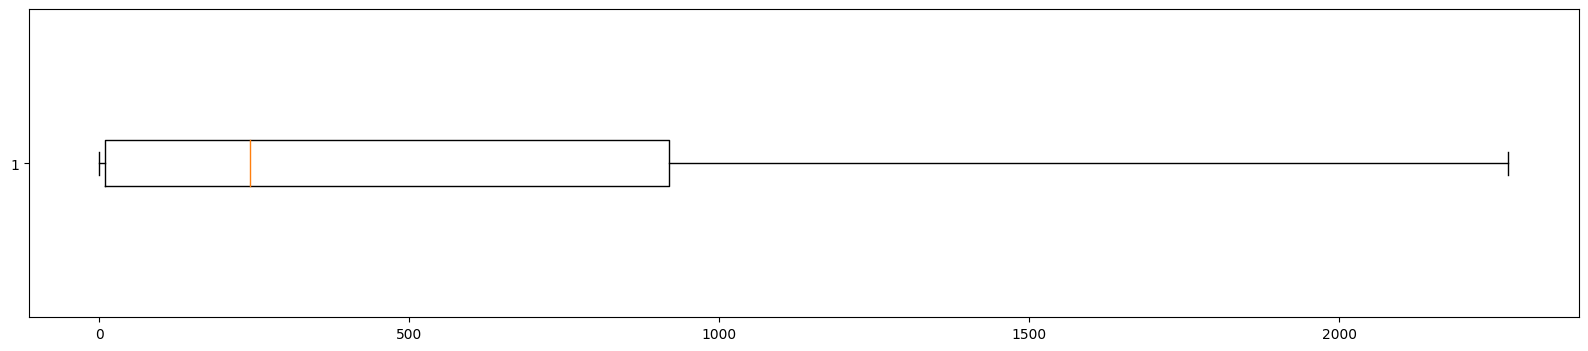

In [315]:
plt.figure(figsize=[20,4])
plt.boxplot(leads_df['Total Time Spent on Website'], vert=False)
plt.show()

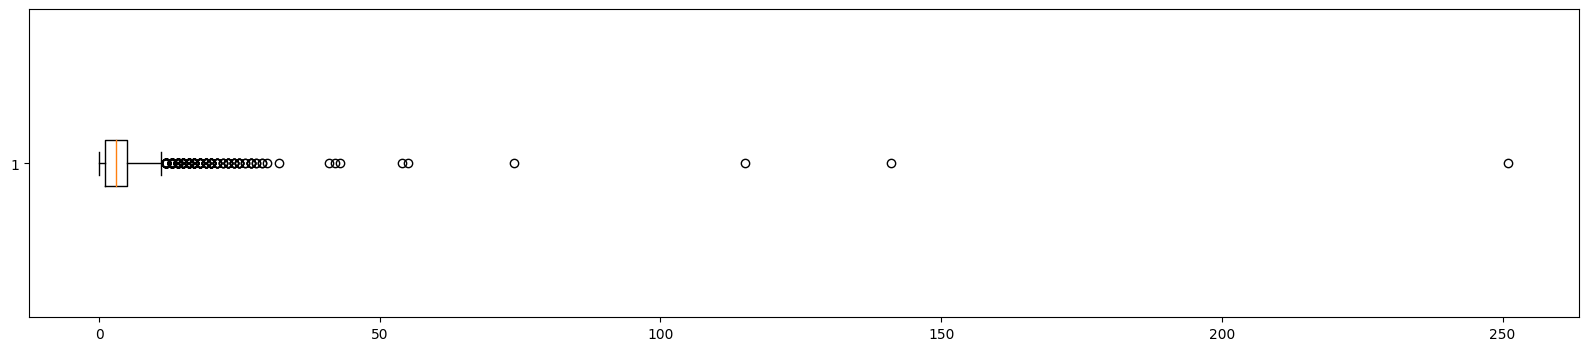

In [316]:
plt.figure(figsize=[20,4])
plt.boxplot(leads_df['TotalVisits'], vert=False)
plt.show()

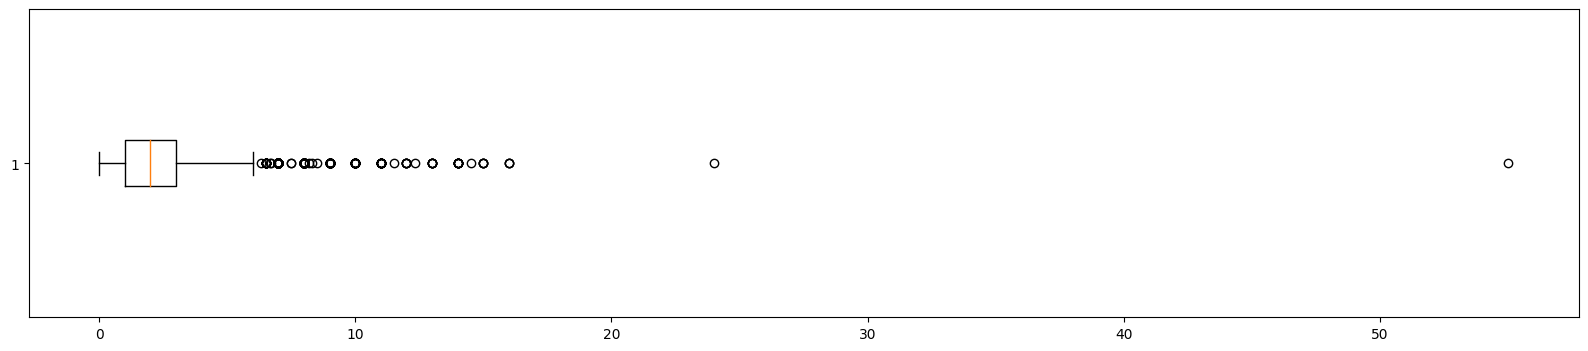

In [297]:
plt.figure(figsize=[20,4])
plt.boxplot(leads_df['Page Views Per Visit'], vert=False)
plt.show()

**Observation:**

There are some outliers for the columns `TotalVisits` and `Page Views Per Visit`. We'll analyze later how best to handle them.

## Lead demographics - Exploratory Data Analysis 

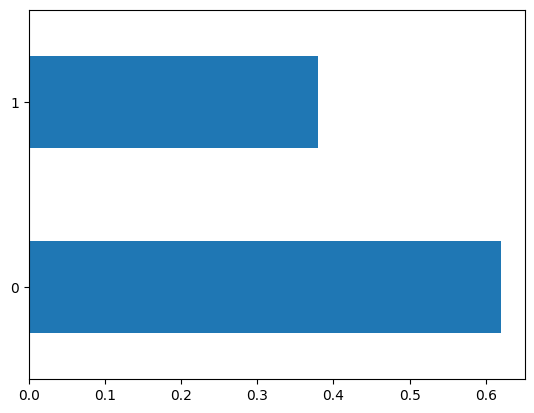

In [322]:
leads_df.Converted.value_counts(normalize=True).plot.barh()
plt.show()

### Lead origin

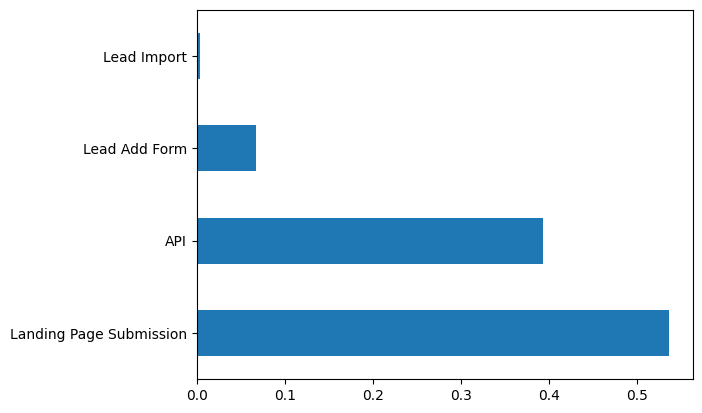

In [317]:
leads_df['Lead Origin'].value_counts(normalize=True).plot.barh()
plt.show()

**Insight**: Most leads originate from the submission on the landing page

### Lead sources

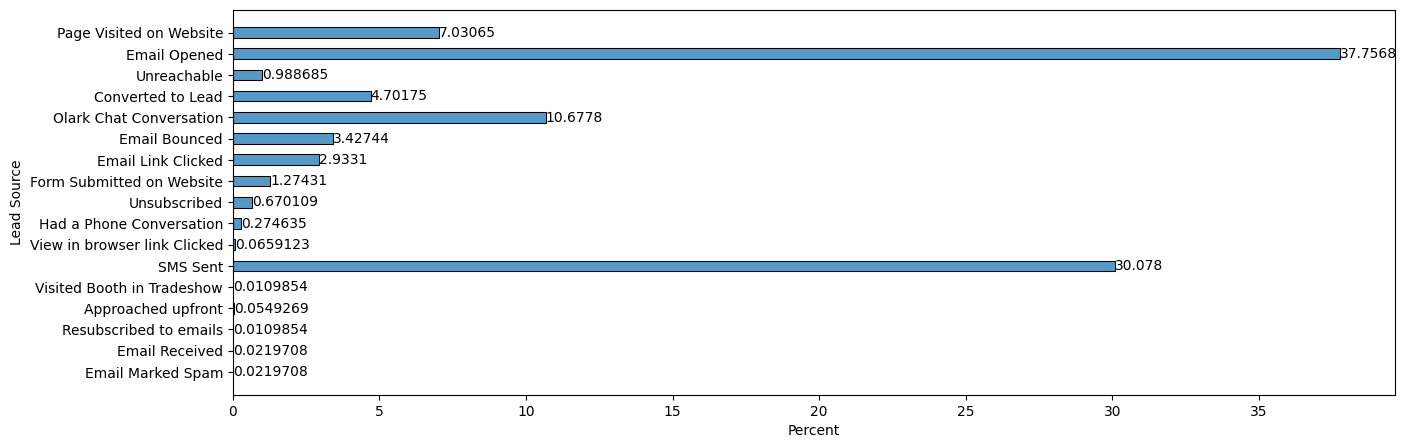

In [323]:
plt.figure(figsize=[15,5])
ax = sns.histplot(y='Lead Source', data=leads_df, stat="percent", shrink=0.5)
ax.bar_label(ax.containers[1])
plt.show()

**Insight:**: SMSes and emails are the most used channels for sourcing leads

### Email preferences

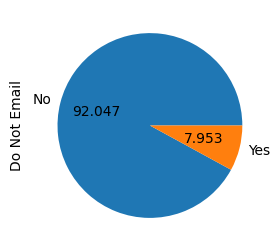

In [324]:
plt.figure(figsize=[15,3])

plt.subplot(1,2,1)
leads_df['Do Not Email'].value_counts(normalize=True).plot.pie(autopct='%.3f')

plt.show()

**Insight**:
    
Most people are okay with getting emails.

### Current occupation

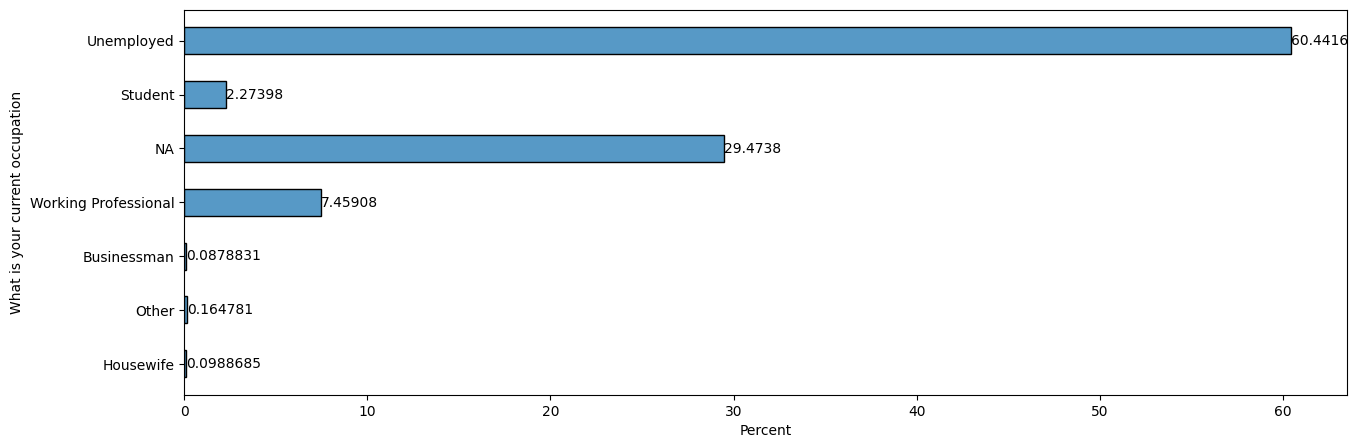

In [16]:
plt.figure(figsize=[15,5])
ax = sns.histplot(y='What is your current occupation', data=leads_df, stat="percent", shrink=0.5)
ax.bar_label(ax.containers[1])
plt.show()

**Insight**: Most leads are unemployed

## Observing correlations between features

### Email preferences vs Conversions

In [264]:
leads_df["Do Not Email"].value_counts(normalize=True)

0    0.920466
1    0.079534
Name: Do Not Email, dtype: float64

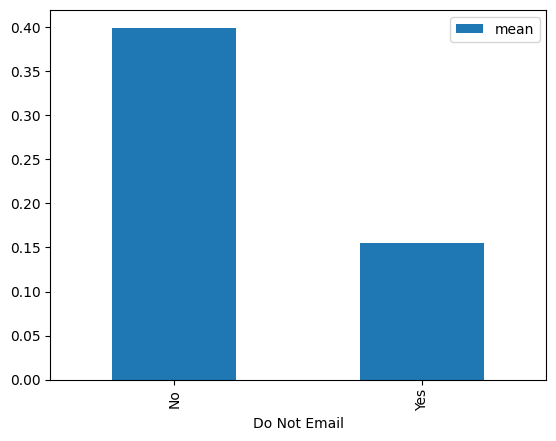

In [327]:
leads_df.groupby("Do Not Email")["Converted"].aggregate(["mean"]).plot.bar()
plt.show()

People who prefer receiving emails have a conversion rate of approximately 40%. People who have opted out of emails have a much lower conversion rate (15%)

In [265]:
leads_df["Do Not Call"].value_counts(normalize=True)

0    0.99978
1    0.00022
Name: Do Not Call, dtype: float64

**Insight**: Most people who prefer getting emails or calls are successfully converted

### Total Visits vs Conversions

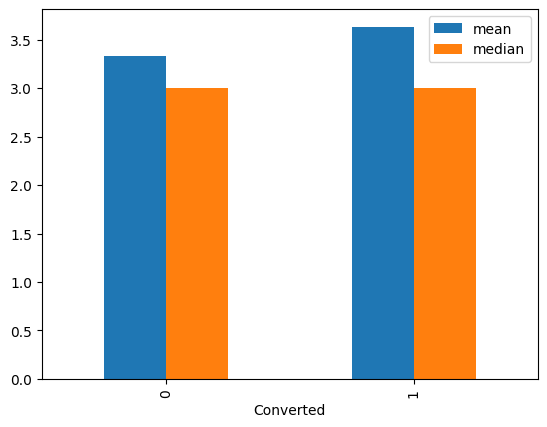

In [328]:
leads_df.groupby("Converted")["TotalVisits"].aggregate(["mean", "median"]).plot.bar()
plt.show()

**Insight**: Total visits don't play any significant role in conversions. Feature scaling could take care of the outliers

### Total Time Spent on Website vs Conversion rate

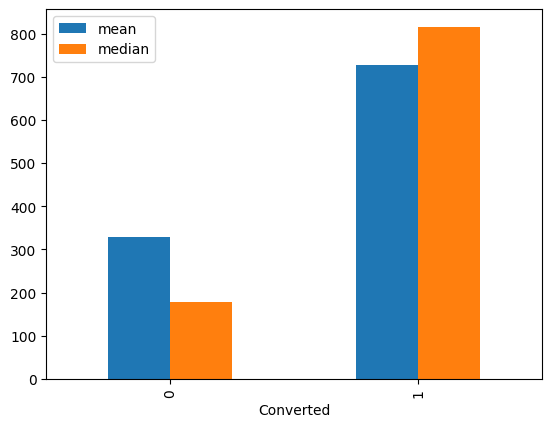

In [330]:
leads_df.groupby("Converted")["Total Time Spent on Website"].aggregate(["mean", "median"]).plot.bar()
plt.show()

**Insight**

Clearly, more time spent on the website is correlated with a higher number of conversions.

### Page Views Per Visit vs Conversions

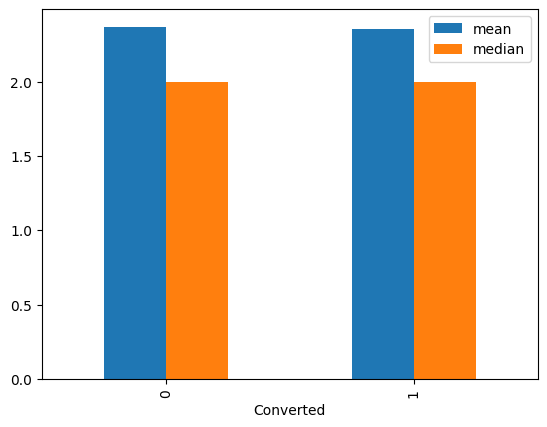

In [331]:
leads_df.groupby("Converted")["Page Views Per Visit"].aggregate(["mean", "median"]).plot.bar()
plt.show()

**Insight:** Page views per visit also have negligible impact on lead conversions. We need not use them for our model so there won't be any need to handle the outliers.

### Lead Origin vs Conversion

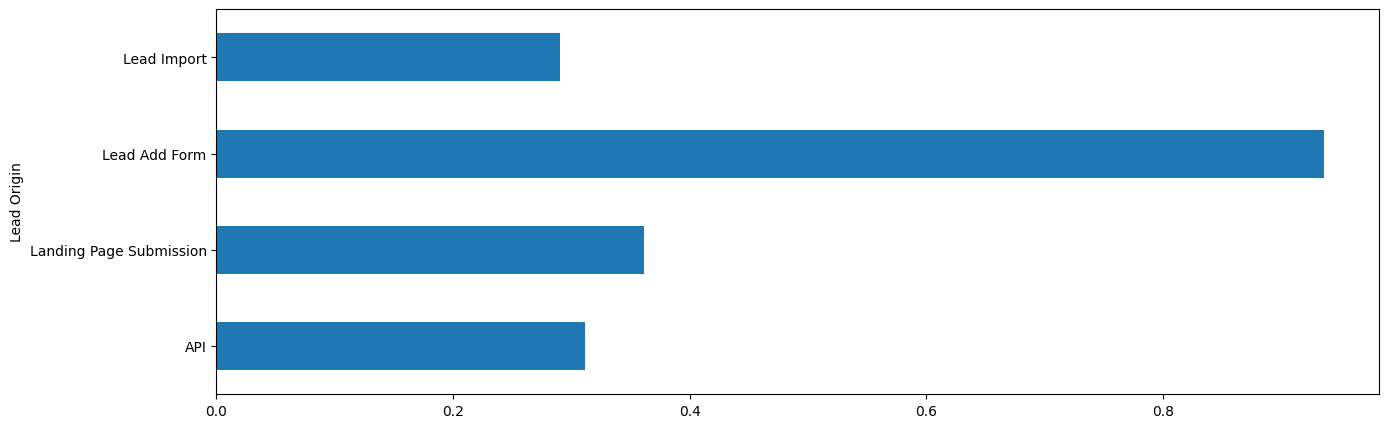

In [332]:
plt.figure(figsize=[15,5])
leads_df.groupby("Lead Origin")["Converted"].mean().plot.barh()
plt.show()

### Lead Sources vs Conversions

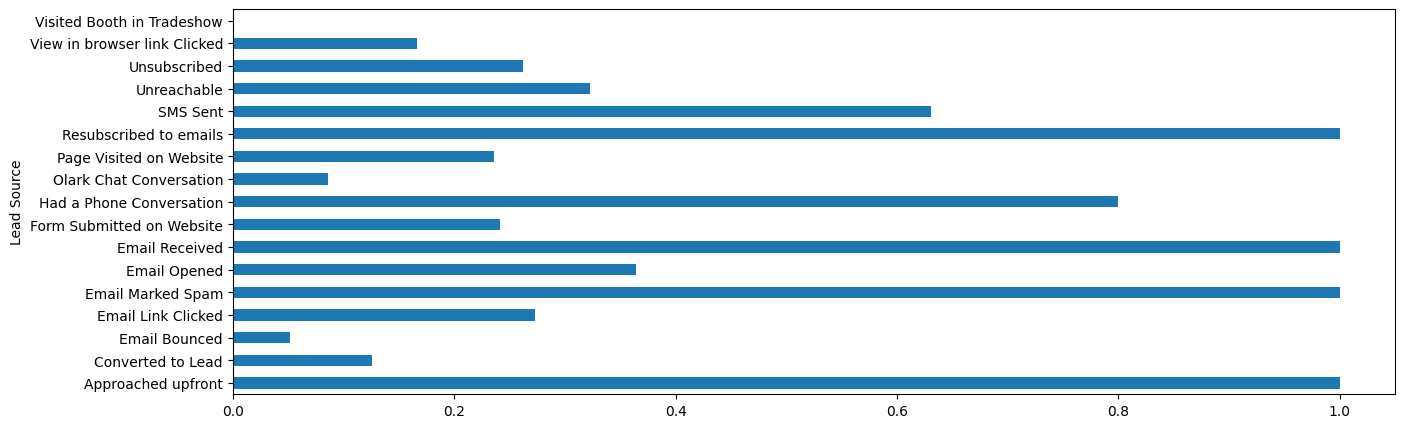

In [333]:
plt.figure(figsize=[15,5])
leads_df.groupby("Lead Source")["Converted"].mean().plot.barh()
plt.show()

**Insight**:

Leads who have received, resubscribed to emails or approached upfront are most likely to convert.

Olark Chat conversation, bounced emails are least like to become successful conversions

## Data preparation

### Convert binary variables into 0 / 1

In [348]:
# List of variables to map

binary_columns =  ['Do Not Email', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads_df[binary_columns] = leads_df[binary_columns].apply(binary_map)

### For categorical variables with multiple levels, create dummy features (one-hot encoded)

For all the categorical columns, we need to create dummy variables

In [349]:
leads_df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [350]:
# Creating dummy variables

dummy = pd.get_dummies(leads_df[['Lead Origin', 'Lead Source', 'Specialization', 'What is your current occupation', 'Last Activity']], drop_first=True)

# Adding the results to the master dataframe
leads_df = pd.concat([leads_df, dummy], axis=1)

In [351]:
leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Converted to Lead,Lead Source_Email Bounced,Lead Source_Email Link Clicked,Lead Source_Email Marked Spam,Lead Source_Email Opened,Lead Source_Email Received,Lead Source_Form Submitted on Website,Lead Source_Had a Phone Conversation,Lead Source_Olark Chat Conversation,Lead Source_Page Visited on Website,Lead Source_Resubscribed to emails,Lead Source_SMS Sent,Lead Source_Unreachable,Lead Source_Unsubscribed,Lead Source_View in browser link Clicked,Lead Source_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_NA,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_NA,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
0,API,Page Visited on Website,0,0,0.0,0,0.0,Page Visited on Website,NA,Unemployed,0,Modified,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,API,Email Opened,0,0,5.0,674,2.5,Email Opened,NA,Unemployed,0,Email Opened,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Email Opened,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1,Email Opened,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Unreachable,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,Landing Page Submission,Converted to Lead,0,1,2.0,1428,1.0,Converted to Lead,NA,Unemployed,0,Modified,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [352]:
# Now that we have created dummies for our categorical columns, so we can drop the original ones
leads_df.drop(['Lead Origin', 'Lead Source', 'Specialization', 'What is your current occupation', 'Last Activity'], axis=1, inplace=True)
leads_df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Converted to Lead,Lead Source_Email Bounced,Lead Source_Email Link Clicked,Lead Source_Email Marked Spam,Lead Source_Email Opened,Lead Source_Email Received,Lead Source_Form Submitted on Website,Lead Source_Had a Phone Conversation,Lead Source_Olark Chat Conversation,Lead Source_Page Visited on Website,Lead Source_Resubscribed to emails,Lead Source_SMS Sent,Lead Source_Unreachable,Lead Source_Unsubscribed,Lead Source_View in browser link Clicked,Lead Source_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_NA,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_NA,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
0,0,0,0.0,0,0.0,0,Modified,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,Email Opened,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,Email Opened,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,1,2.0,1428,1.0,0,Modified,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [354]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 66 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          9103 non-null   int64  
 1   Converted                                             9103 non-null   int64  
 2   TotalVisits                                           9103 non-null   float64
 3   Total Time Spent on Website                           9103 non-null   int64  
 4   Page Views Per Visit                                  9103 non-null   float64
 5   A free copy of Mastering The Interview                9103 non-null   int64  
 6   Last Notable Activity                                 9103 non-null   object 
 7   Lead Origin_Landing Page Submission                   9103 non-null   uint8  
 8   Lead Origin_Lead Add Form                             9103

In [356]:
leads_df.drop(['Last Notable Activity'], axis=1, inplace=True)

### Split the dataset into training and testing sets

In [357]:
from sklearn.model_selection import train_test_split

In [359]:
# Putting feature variable to X
X = leads_df.drop(['Converted'], axis=1)

X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Converted to Lead,Lead Source_Email Bounced,Lead Source_Email Link Clicked,Lead Source_Email Marked Spam,Lead Source_Email Opened,Lead Source_Email Received,Lead Source_Form Submitted on Website,Lead Source_Had a Phone Conversation,Lead Source_Olark Chat Conversation,Lead Source_Page Visited on Website,Lead Source_Resubscribed to emails,Lead Source_SMS Sent,Lead Source_Unreachable,Lead Source_Unsubscribed,Lead Source_View in browser link Clicked,Lead Source_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_NA,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_NA,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [360]:
# Putting response variable to y
y = leads_df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [436]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature scaling

In [362]:
from sklearn.preprocessing import StandardScaler

In [437]:
scaler = StandardScaler()

numerical_columns = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Converted to Lead,Lead Source_Email Bounced,Lead Source_Email Link Clicked,Lead Source_Email Marked Spam,Lead Source_Email Opened,Lead Source_Email Received,Lead Source_Form Submitted on Website,Lead Source_Had a Phone Conversation,Lead Source_Olark Chat Conversation,Lead Source_Page Visited on Website,Lead Source_Resubscribed to emails,Lead Source_SMS Sent,Lead Source_Unreachable,Lead Source_Unsubscribed,Lead Source_View in browser link Clicked,Lead Source_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_NA,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_NA,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
7962,0,-0.092900,1.476324,-0.394072,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5520,0,0.695064,-0.771066,2.111481,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1962,0,0.301082,-0.571257,0.061483,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1566,0,2.074000,1.393834,0.517039,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9170,0,-0.683873,-0.881052,-1.077404,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


## Model building

In [380]:
import statsmodels.api as sm

### Feature Selection Using RFE

We have way too many features. To begin with, we'll select 15 features usinng RFE.

In [365]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [438]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [439]:
rfe.support_

array([ True, False,  True, False, False,  True,  True, False,  True,
       False, False, False, False, False, False,  True,  True, False,
        True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False,  True,  True, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False])

In [440]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 28),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 25),
 ('A free copy of Mastering The Interview', False, 27),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 33),
 ('Lead Source_Converted to Lead', True, 1),
 ('Lead Source_Email Bounced', False, 8),
 ('Lead Source_Email Link Clicked', False, 11),
 ('Lead Source_Email Marked Spam', False, 16),
 ('Lead Source_Email Opened', False, 39),
 ('Lead Source_Email Received', False, 38),
 ('Lead Source_Form Submitted on Website', False, 2),
 ('Lead Source_Had a Phone Conversation', True, 1),
 ('Lead Source_Olark Chat Conversation', True, 1),
 ('Lead Source_Page Visited on Website', False, 12),
 ('Lead Source_Resubscribed to emails', True, 1),
 ('Lead Source_SMS Sent', False, 5),
 ('Lead Source_Unreachable', False, 40),
 ('Lead Source_Unsubscribed', True, 1),
 ('Lead Source_View in brow

In [441]:
#Columns which have been removed after RFE
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead Origin_Lead Import',
       'Lead Source_Email Bounced', 'Lead Source_Email Link Clicked',
       'Lead Source_Email Marked Spam', 'Lead Source_Email Opened',
       'Lead Source_Email Received', 'Lead Source_Form Submitted on Website',
       'Lead Source_Page Visited on Website', 'Lead Source_SMS Sent',
       'Lead Source_Unreachable', 'Lead Source_View in browser link Clicked',
       'Lead Source_Visited Booth in Tradeshow',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Med

In [442]:
# Which columns got selected after RFE
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Converted to Lead', 'Lead Source_Had a Phone Conversation',
       'Lead Source_Olark Chat Conversation',
       'Lead Source_Resubscribed to emails', 'Lead Source_Unsubscribed',
       'Specialization_NA', 'What is your current occupation_Housewife',
       'What is your current occupation_NA',
       'What is your current occupation_Working Professional',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent'],
      dtype='object')

In [443]:
# Also remove the columns `Specialization_NA`, and `What is your current occupation_NA` as they are basically null values

col = col.drop(['Specialization_NA', 'What is your current occupation_NA'], 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Converted to Lead', 'Lead Source_Had a Phone Conversation',
       'Lead Source_Olark Chat Conversation',
       'Lead Source_Resubscribed to emails', 'Lead Source_Unsubscribed',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent'],
      dtype='object')

#### Model iteration 1

In [444]:
X_train_sm = sm.add_constant(X_train[col])

lr_v1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lr_v1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6359
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2749.3
Date:                Tue, 18 Apr 2023   Deviance:                       5498.5
Time:                        09:51:28   Pearson chi2:                 6.75e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3718
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7988      0.063    -12.688      0.000      -0.922      -0.675
Do Not Email                                            -1.5873      0.168     -9.472      0.000      -1.916      -1.259
Total Time Spent on Website                              0.9986      0.036     27.823      0.000       0.928       1.069
Lead Origin_Landing Page Submission                     -0.5931      0.075     -7.937      0.000      -0.740      -0.447
Lead Origin_Lead Add Form                                3.6000      0.211     17.035      0.000       3.186       4.014
Lead Source_Converted to Lead                           -1.4140      0.206     -6.858      0.000      -1.818      -1.010
Lead Source_Had a Phone Conversation                     1.6950      0.619      2.738      0.006       0.482       2.908
Lead Source_Olark Chat Conversation                     -1.2765      0.159     -8.020      0.000      -1.588      -0.965
Lead Source_Resubscribed to emails                      12.1223   2.41e+04      0.001      1.000   -4.72e+04    4.72e+04
Lead Source_Unsubscribed                                 1.0723      0.464      2.310      0.021       0.163       1.982
What is your current occupation_Housewife               23.2077   1.59e+04      0.001      0.999   -3.11e+04    3.12e+04
What is your current occupation_Working Professional     2.8190      0.185     15.239      0.000       2.456       3.182
Last Activity_Resubscribed to emails                    12.1223   2.41e+04      0.001      1.000   -4.72e+04    4.72e+04
Last Activity_SMS Sent                                   1.2575      0.073     17.193      0.000       1.114       1.401
========================================================================================================================
"""

In [445]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7962    0.792485
5520    0.103228
1962    0.330751
1566    0.943694
9170    0.157282
5097    0.157282
8954    0.424159
309     0.143042
5519    0.396265
1050    0.430897
dtype: float64

In [446]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.7924848 , 0.103228  , 0.33075071, 0.9436945 , 0.15728236,
       0.15728236, 0.42415862, 0.14304167, 0.39626482, 0.430897  ])

Creating a dataframe with the actual Converted flag and the predicted probabilities:

In [447]:
y_train_pred_final = pd.DataFrame({'Converted': y_train.values, 'Converted_prob': y_train_pred})
y_train_pred_final.head()

,Converted,Converted_prob
0,0,0.792485
1,0,0.103228
2,0,0.330751
3,1,0.943694
4,0,0.157282


### Manual Feature Selection


Now, we'll build subsequent models by manually eliminating features that are not important. For that, we'll check for Multicollinearity (VIF)

In [388]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [389]:
# Since we'll need to compute the VIFs for every new model we try, we can write the logic inside a function and invoke it whenever we need

def get_vif(X_train):

    # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [448]:
# Get the VIFs for the current model's features
vif = get_vif(X_train[col])
vif

,Features,VIF
7,Lead Source_Resubscribed to emails,inf
11,Last Activity_Resubscribed to emails,inf
2,Lead Origin_Landing Page Submission,1.48
12,Last Activity_SMS Sent,1.40
3,Lead Origin_Lead Add Form,1.19
0,Do Not Email,1.17
1,Total Time Spent on Website,1.15
10,What is your current occupation_Working Professional,1.13
8,Lead Source_Unsubscribed,1.08
4,Lead Source_Converted to Lead,1.05


`Lead Source_Resubscribed to emails` has an infinite VIF, meaning that there is a perfect correlation. R2 =1, which lead sto 1/(1-R2) infinity

#### Model iteration 2

In this iteration, we'll drop the we shall drop the column with the highest VIF (`Lead Source_Resubscribed to emails`), build a new model, and re-analyze:

In [449]:
col = col.drop('Lead Source_Resubscribed to emails', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Converted to Lead', 'Lead Source_Had a Phone Conversation',
       'Lead Source_Olark Chat Conversation', 'Lead Source_Unsubscribed',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent'],
      dtype='object')

In [450]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
lr_v2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lr_v2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6359
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2749.3
Date:                Tue, 18 Apr 2023   Deviance:                       5498.5
Time:                        09:52:19   Pearson chi2:                 6.75e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3718
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7988      0.063    -12.688      0.000      -0.922      -0.675
Do Not Email                                            -1.5873      0.168     -9.472      0.000      -1.916      -1.259
Total Time Spent on Website                              0.9986      0.036     27.823      0.000       0.928       1.069
Lead Origin_Landing Page Submission                     -0.5931      0.075     -7.937      0.000      -0.740      -0.447
Lead Origin_Lead Add Form                                3.6000      0.211     17.035      0.000       3.186       4.014
Lead Source_Converted to Lead                           -1.4140      0.206     -6.858      0.000      -1.818      -1.010
Lead Source_Had a Phone Conversation                     1.6950      0.619      2.738      0.006       0.482       2.908
Lead Source_Olark Chat Conversation                     -1.2765      0.159     -8.020      0.000      -1.588      -0.965
Lead Source_Unsubscribed                                 1.0723      0.464      2.310      0.021       0.163       1.982
What is your current occupation_Housewife               23.2077   1.59e+04      0.001      0.999   -3.11e+04    3.12e+04
What is your current occupation_Working Professional     2.8190      0.185     15.239      0.000       2.456       3.182
Last Activity_Resubscribed to emails                    24.2447   4.82e+04      0.001      1.000   -9.44e+04    9.45e+04
Last Activity_SMS Sent                                   1.2575      0.073     17.193      0.000       1.114       1.401
========================================================================================================================
"""

In [451]:
# Get the VIFs for the current model's features
vif = get_vif(X_train[col])
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,1.48
11,Last Activity_SMS Sent,1.40
3,Lead Origin_Lead Add Form,1.19
0,Do Not Email,1.17
1,Total Time Spent on Website,1.15
9,What is your current occupation_Working Professional,1.13
7,Lead Source_Unsubscribed,1.08
4,Lead Source_Converted to Lead,1.05
6,Lead Source_Olark Chat Conversation,1.04
5,Lead Source_Had a Phone Conversation,1.00


**Observation**:
    
`What is your current occupation_Housewife` has a high p-value

#### Model iteration 3

Next, we need to drop the variable `What is your current occupation_Housewife`

In [452]:
col = col.drop('What is your current occupation_Housewife', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Converted to Lead', 'Lead Source_Had a Phone Conversation',
       'Lead Source_Olark Chat Conversation', 'Lead Source_Unsubscribed',
       'What is your current occupation_Working Professional',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent'],
      dtype='object')

In [453]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
lr_v3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lr_v3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6360
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2756.1
Date:                Tue, 18 Apr 2023   Deviance:                       5512.2
Time:                        09:52:28   Pearson chi2:                 6.76e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3704
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7945      0.063    -12.635      0.000      -0.918      -0.671
Do Not Email                                            -1.5916      0.167     -9.503      0.000      -1.920      -1.263
Total Time Spent on Website                              0.9986      0.036     27.857      0.000       0.928       1.069
Lead Origin_Landing Page Submission                     -0.5869      0.075     -7.867      0.000      -0.733      -0.441
Lead Origin_Lead Add Form                                3.6044      0.211     17.062      0.000       3.190       4.018
Lead Source_Converted to Lead                           -1.4214      0.206     -6.896      0.000      -1.825      -1.017
Lead Source_Had a Phone Conversation                     1.6864      0.619      2.725      0.006       0.473       2.900
Lead Source_Olark Chat Conversation                     -1.2813      0.159     -8.052      0.000      -1.593      -0.969
Lead Source_Unsubscribed                                 1.0684      0.464      2.302      0.021       0.159       1.978
What is your current occupation_Working Professional     2.8138      0.185     15.212      0.000       2.451       3.176
Last Activity_Resubscribed to emails                    22.2404   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Last Activity_SMS Sent                                   1.2495      0.073     17.104      0.000       1.106       1.393
========================================================================================================================
"""

In [454]:
# Get the VIFs for the current model's features
vif = get_vif(X_train[col])
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,1.48
10,Last Activity_SMS Sent,1.40
3,Lead Origin_Lead Add Form,1.19
0,Do Not Email,1.17
1,Total Time Spent on Website,1.15
8,What is your current occupation_Working Professional,1.13
7,Lead Source_Unsubscribed,1.08
4,Lead Source_Converted to Lead,1.05
6,Lead Source_Olark Chat Conversation,1.04
5,Lead Source_Had a Phone Conversation,1.00


Observation: `Last Activity_Resubscribed to emails` has a high p-value.

#### Model iteration 4

Next, we need to drop the variable `Last Activity_Resubscribed to emails` due to its high p-value

In [455]:
col = col.drop('Last Activity_Resubscribed to emails', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Converted to Lead', 'Lead Source_Had a Phone Conversation',
       'Lead Source_Olark Chat Conversation', 'Lead Source_Unsubscribed',
       'What is your current occupation_Working Professional',
       'Last Activity_SMS Sent'],
      dtype='object')

In [456]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
lr_v4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lr_v4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6361
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2757.9
Date:                Tue, 18 Apr 2023   Deviance:                       5515.9
Time:                        09:52:36   Pearson chi2:                 6.76e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3701
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7913      0.063    -12.594      0.000      -0.914      -0.668
Do Not Email                                            -1.5919      0.167     -9.507      0.000      -1.920      -1.264
Total Time Spent on Website                              0.9977      0.036     27.842      0.000       0.927       1.068
Lead Origin_Landing Page Submission                     -0.5890      0.075     -7.898      0.000      -0.735      -0.443
Lead Origin_Lead Add Form                                3.6012      0.211     17.048      0.000       3.187       4.015
Lead Source_Converted to Lead                           -1.4227      0.206     -6.904      0.000      -1.827      -1.019
Lead Source_Had a Phone Conversation                     1.6849      0.619      2.722      0.006       0.472       2.898
Lead Source_Olark Chat Conversation                     -1.2843      0.159     -8.072      0.000      -1.596      -0.972
Lead Source_Unsubscribed                                 1.0670      0.464      2.300      0.021       0.158       1.976
What is your current occupation_Working Professional     2.8127      0.185     15.208      0.000       2.450       3.175
Last Activity_SMS Sent                                   1.2478      0.073     17.086      0.000       1.105       1.391
========================================================================================================================
"""

In [457]:
# Get the VIFs for the current model's features
vif = get_vif(X_train[col])
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,1.48
9,Last Activity_SMS Sent,1.40
3,Lead Origin_Lead Add Form,1.19
0,Do Not Email,1.17
1,Total Time Spent on Website,1.15
8,What is your current occupation_Working Professional,1.13
7,Lead Source_Unsubscribed,1.08
4,Lead Source_Converted to Lead,1.05
6,Lead Source_Olark Chat Conversation,1.04
5,Lead Source_Had a Phone Conversation,1.00


## Model evaluation

In [458]:
from sklearn import metrics

In [459]:
y_train_pred_final = pd.DataFrame({'Converted': y_train.values, 'Converted_prob': y_train_pred})
y_train_pred_final.head()

,Converted,Converted_prob
0,0,0.792485
1,0,0.103228
2,0,0.330751
3,1,0.943694
4,0,0.157282


In [460]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,predicted
0,0,0.792485,1
1,0,0.103228,0
2,0,0.330751,0
3,1,0.943694,1
4,0,0.157282,0


### Confusion matrix

In [463]:
# Predicted     not_converted    converted
# Actual
# not_converted        3270      365
# converted            579       708  

In [462]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3534  419]
 [ 837 1582]]


### Check accuracy and other scores

In [464]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.802887633396108


In [465]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [466]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6539892517569244

In [467]:
# Let us calculate specificity
TN / float(TN+FP)

0.8940045535036681

In [468]:
# Calculate false postive rate - predicting a Conversion when a lead was not converted
print(FP/ float(TN+FP))

0.1059954464963319


In [469]:
# positive predictive value 
print (TP / float(TP+FP))

0.7906046976511744


In [470]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8085106382978723


### Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [473]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [475]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

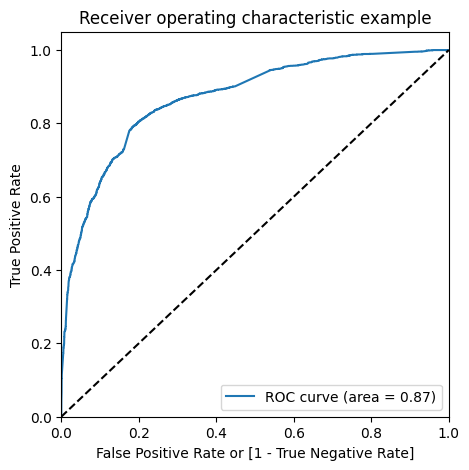

In [476]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

## Model fine-tuning

### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [477]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
    
y_train_pred_final.head()

,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.792485,1,1,1,1,1,1,1,1,1,0,0
1,0,0.103228,0,1,1,0,0,0,0,0,0,0,0
2,0,0.330751,0,1,1,1,1,0,0,0,0,0,0
3,1,0.943694,1,1,1,1,1,1,1,1,1,1,1
4,0,0.157282,0,1,1,0,0,0,0,0,0,0,0


In [478]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1 = sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] = [i, accuracy, sensitivity, specificity]

print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379630  1.000000  0.000000
0.1   0.1  0.553358  0.979330  0.292689
0.2   0.2  0.735405  0.878462  0.647862
0.3   0.3  0.783741  0.838776  0.750063
0.4   0.4  0.796610  0.724266  0.840880
0.5   0.5  0.802888  0.653989  0.894005
0.6   0.6  0.795198  0.583299  0.924867
0.7   0.7  0.777621  0.496073  0.949911
0.8   0.8  0.755336  0.398512  0.973691
0.9   0.9  0.703233  0.233568  0.990640


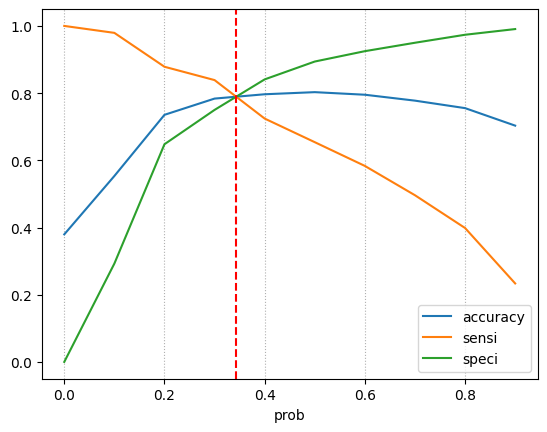

In [495]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
ax = cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
ax.grid(axis='x', zorder=3, linestyle='dotted')
plt.axvline(x=0.343, color='r', linestyle='--') # additing axline

plt.show()

**Insight**:
    
From the curve above, `0.343` is the optimum point to take it as a cutoff probability.

## Re-evaluating model after fine-tuning

In [496]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.343 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.792485,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.103228,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.330751,0,1,1,1,1,0,0,0,0,0,0,0
3,1,0.943694,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.157282,0,1,1,0,0,0,0,0,0,0,0,0


In [497]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7984934086629002

### Confusion matrix

In [498]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3120,  833],
       [ 451, 1968]])

In [499]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

### Check the scores

In [500]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8135593220338984

In [501]:
# Let us calculate specificity
TN / float(TN+FP)

0.789273969137364

In [502]:
# Calculate false postive rate - predicting conversion when a lead was not converted
print(FP/ float(TN+FP))

0.21072603086263597


In [503]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7026062120671189


In [504]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8737048445813498


### Precision and Recall

In [508]:
from sklearn.metrics import precision_recall_curve

In [505]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3534,  419],
       [ 837, 1582]])

In [506]:
# precision
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7906046976511744

In [507]:
# recall
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6539892517569244

Plot precision-recall curve:

In [509]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

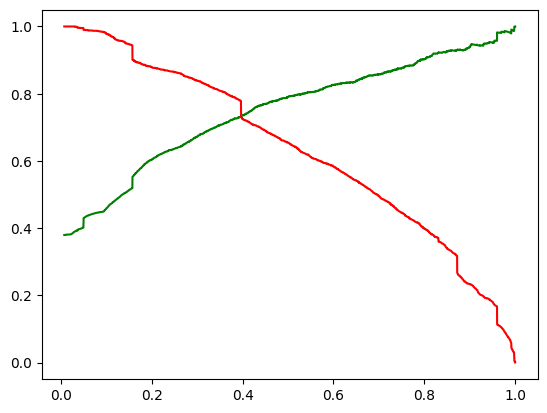

In [510]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Model testing

In [513]:
# Let's look at what columns we have
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Converted to Lead', 'Lead Source_Had a Phone Conversation',
       'Lead Source_Olark Chat Conversation', 'Lead Source_Unsubscribed',
       'What is your current occupation_Working Professional',
       'Last Activity_SMS Sent'],
      dtype='object')

In [515]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Converted to Lead,Lead Source_Had a Phone Conversation,Lead Source_Olark Chat Conversation,Lead Source_Unsubscribed,What is your current occupation_Working Professional,Last Activity_SMS Sent
3504,0,424,1,0,0,0,0,0,0,0
4050,0,0,0,1,0,0,0,0,0,1
7201,1,712,1,0,0,0,0,0,0,1
1196,0,423,1,0,0,0,0,0,0,0
8219,0,247,1,0,0,0,0,0,0,0


### Apply feature scaling

In [516]:
scaler = StandardScaler()


X_test[['Total Time Spent on Website']] = scaler.fit_transform(X_test[['Total Time Spent on Website']])

X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Converted to Lead,Lead Source_Had a Phone Conversation,Lead Source_Olark Chat Conversation,Lead Source_Unsubscribed,What is your current occupation_Working Professional,Last Activity_SMS Sent
3504,0,-0.108519,1,0,0,0,0,0,0,0
4050,0,-0.888077,0,1,0,0,0,0,0,1
7201,1,0.420993,1,0,0,0,0,0,0,1
1196,0,-0.110357,1,0,0,0,0,0,0,0
8219,0,-0.433947,1,0,0,0,0,0,0,0


### Make predictions

In [517]:
X_test_sm = sm.add_constant(X_test)

In [518]:
y_test_pred = res.predict(X_test_sm)

In [519]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [520]:
# Putting LeadID to index
y_test_df['LeadID'] = y_test_df.index

In [521]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
# Let's see the head
y_pred_1.head()

,0
3504,0.184143
4050,0.959756
7201,0.213439
1196,0.183868
8219,0.140250


In [522]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [523]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,LeadID,0
0,0,3504,0.184143
1,1,4050,0.959756
2,0,7201,0.213439
3,0,1196,0.183868
4,1,8219,0.140250


In [524]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [526]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['LeadID','Converted','Converted_prob'], axis=1)
y_pred_final.head()

,LeadID,Converted,Converted_prob
0,3504,0,0.184143
1,4050,1,0.959756
2,7201,0,0.213439
3,1196,0,0.183868
4,8219,1,0.140250


#### Apply selected ROC cutoff

In [529]:
roc_cutoff = 0.343

In [530]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > roc_cutoff else 0)
y_pred_final.head()

,LeadID,Converted,Converted_prob,lead_score,final_predicted
0,3504,0,0.184143,18,0
1,4050,1,0.959756,95,1
2,7201,0,0.213439,21,0
3,1196,0,0.183868,18,0
4,8219,1,0.140250,14,0


#### Measure performance

In [536]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8011717319663128

In [537]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [538]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8135593220338984

In [539]:
# Specificity
TN / float(TN+FP)

0.789273969137364

### Assign a lead score

In [533]:
# We'll convert the probability into a lead score
y_pred_final['lead_score']=(y_pred_final['Converted_prob']*100).astype("int64")

# Sort based on highest lead scores first
y_pred_final.sort_values(by='Converted_prob', ascending=False)

,LeadID,Converted,Converted_prob,lead_score,final_predicted
1424,4613,1,0.998926,99,1
1509,2672,1,0.997489,99,1
1041,4772,1,0.997489,99,1
1095,4782,1,0.997489,99,1
717,2765,1,0.997489,99,1
2570,5784,1,0.997489,99,1
2556,2338,1,0.997489,99,1
1191,5822,1,0.997489,99,1
1204,4776,1,0.997489,99,1
1239,4791,1,0.997489,99,1


In [535]:
# Bottom 5

y_pred_final.tail(5)

,LeadID,Converted,Converted_prob,lead_score,final_predicted
2726,6508,0,0.292615,29,0
2727,315,0,0.266344,26,0
2728,3766,0,0.111316,11,0
2729,8043,1,0.828831,82,1
2730,5826,1,0.895975,89,1


## Conclusion

Priority can be given to the customers with high `lead_score` values, as these are most likely to convert.

In [544]:
# Here are the features and their contribution towards lead scoring

final_parameters = res.params[1:]
final_parameters

Do Not Email                                           -1.591941
Total Time Spent on Website                             0.997720
Lead Origin_Landing Page Submission                    -0.589005
Lead Origin_Lead Add Form                               3.601165
Lead Source_Converted to Lead                          -1.422688
Lead Source_Had a Phone Conversation                    1.684930
Lead Source_Olark Chat Conversation                    -1.284270
Lead Source_Unsubscribed                                1.067001
What is your current occupation_Working Professional    2.812666
Last Activity_SMS Sent                                  1.247845
dtype: float64